In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [10]:
bank=pd.read_csv("C:/Users/Paresh/Downloads/bank-full.csv",sep=';')


In [11]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
#Shape of the data set
bank.shape


(45211, 17)

In [14]:
# select columns
columns = ["age", "balance", "duration", "campaign", "y"]
bank_sel = bank[columns]
bank_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

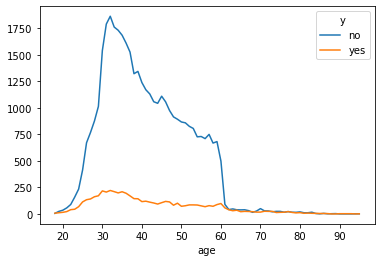

In [18]:
pd.crosstab(bank_sel.age,bank_sel.y).plot(kind="line")

In [19]:
bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})
bank_sel.tail()

<ipython-input-19-7629bcf75301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_sel['outcome'] = bank_sel.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


In [20]:
# Dividing our data into input and output variables 
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = bank_sel[feature_col]
Y = bank_sel[output_target]


In [21]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)


C:\Users\Paresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [22]:
#Predict for X dataset
y_pred = classifier.predict(X)


In [24]:
y_pred


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [25]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)
((381+395)/(381+197+123+395))*100


[[39342   580]
 [ 4435   854]]


70.8029197080292

In [26]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)


In [28]:
auc

0.5734694329116669

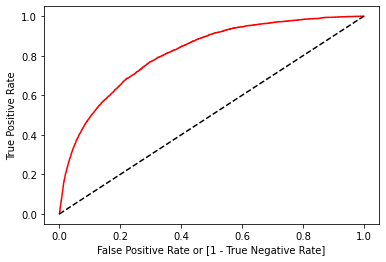

In [29]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [30]:
auc

0.5734694329116669